In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import perceptron
import regressao_linear
import regressao_logistica
import regressao_logistica_wd
from IPython.display import clear_output

## 1 - Leitura inicial dos datasets

In [313]:
df_train = pd.read_csv('dataset_digits/train.csv', sep=';')
df_test = pd.read_csv('dataset_digits/test.csv', sep=';')

In [314]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2182,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2183,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2184,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [315]:
df_test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1111,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1112,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2 - Redução da dimensão das amostras

### 2.1 - Intensidade e simetria das imagens

In [316]:
# Funções utilizadas para reduzir a dimensão das amostras

# Calcula a intensidade de cada um dos dígitos
def calc_intensidade(df):
    return df.loc[:, df.columns != "label"].sum(axis=1) / 255

# Calcula a simetria dos dígitos
def calc_simetria(linha_df):
    # Transforma a linha em um array 28x28 numpy
    matriz_img = np.array(linha_df).reshape(28, 28)

    # Separa a matriz ao meio verticalmente, obtendo o lado esquerdo e o lado direito
    lado_esquerdo = matriz_img[:, :14]
    # Inverte as colunas da esquerda para a direita
    lado_direito = np.fliplr(matriz_img[:, 14:])

    # Separa a matriz ao meio horizontalmente
    metade_superior = matriz_img[:14, :]
    metade_inferior = np.flipud(matriz_img[14:, :])

    # Obtem o modulo da diferença entre cada elemento das metades
    diferenca_vertical = np.abs(lado_esquerdo - lado_direito)
    diferenca_horizontal = np.abs(metade_superior - metade_inferior)

    # Soma todos os elementos da matriz com os valores absolutos e divide por 255
    simetria_vertical = np.sum(diferenca_vertical) / 255
    simetria_horizontal = np.sum(diferenca_horizontal) / 255

    return simetria_vertical + simetria_horizontal

### 2.2 - Criando o dataframe train_redu

In [317]:
df_train_redu = pd.DataFrame(columns=['label', 'intensidade', 'simetria'])

df_train_redu['label'] = df_train['label']
df_train_redu['intensidade'] = calc_intensidade(df_train)
df_train_redu['simetria'] = df_train.loc[:, df_train.columns != "label"].apply(calc_simetria, axis=1)

df_train_redu.to_csv('train_redu.csv', index=False)
df_train_redu

,label,intensidade,simetria
0,0,145.435294,148.572549
1,0,118.576471,137.113725
2,0,127.600000,134.047059
3,0,138.047059,151.003922
4,0,146.215686,122.501961
...,...,...,...
2181,5,105.686275,133.890196
2182,5,113.050980,116.698039
2183,5,110.725490,133.019608
2184,5,99.305882,132.133333


### 2.3 - Criando o dataframe test_redu

In [318]:
df_test_redu = pd.DataFrame(columns=['label', 'intensidade', 'simetria'])

df_test_redu['label'] = df_test['label']
df_test_redu['intensidade'] = calc_intensidade(df_test)
df_test_redu['simetria'] = df_test.loc[:, df_test.columns != "label"].apply(calc_simetria, axis=1)

df_test_redu.to_csv('test_redu.csv', index=False)
df_test_redu

,label,intensidade,simetria
0,0,147.933333,130.470588
1,0,131.054902,122.721569
2,0,134.890196,151.725490
3,0,139.976471,133.921569
4,0,129.580392,130.274510
...,...,...,...
1110,5,96.121569,139.521569
1111,5,98.439216,130.729412
1112,5,95.141176,122.227451
1113,5,106.882353,128.007843


### 2.4 - Gráfico do treino e teste

In [319]:
def plot_grafico_dataframe():
    marcadores = {
        0: 'o',   # círculo
        1: 's',   # quadrado
        4: '^',   # triângulo
        5: 'x',   # X
    }

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # GRÁFICO TREINO
    for label, marcador in marcadores.items():
        subset = df_train_redu[df_train_redu['label'] == label]
        axes[0].scatter(
            subset['intensidade'],
            subset['simetria'],
            label=f'Dígito {label}',
            marker=marcador,
            alpha=0.7
        )

    axes[0].set_title('Treino: Intensidade vs Simetria')
    axes[0].set_xlabel('Intensidade')
    axes[0].set_ylabel('Simetria')
    axes[0].legend()
    axes[0].grid(True)

    # GRÁFICO TESTE 
    for label, marcador in marcadores.items():
        subset = df_test_redu[df_test_redu['label'] == label]
        axes[1].scatter(
            subset['intensidade'],
            subset['simetria'],
            label=f'Dígito {label}',
            marker=marcador,
            alpha=0.7
        )

    axes[1].set_title('Teste: Intensidade vs Simetria')
    axes[1].set_xlabel('Intensidade')
    axes[1].set_ylabel('Simetria')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

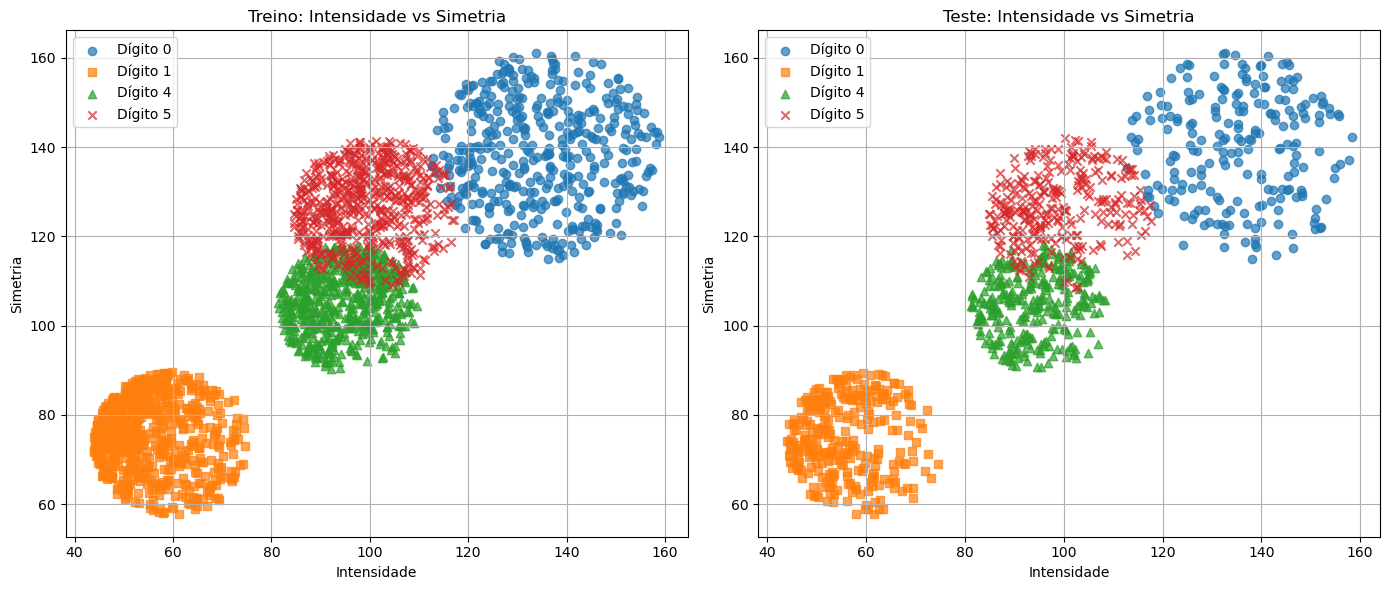

In [320]:
plot_grafico_dataframe()

## 3 - Classificação dos dígitos 1 x 5

### 3.1 - Filtrando os dados para os valores de label 1 e 5

#### 3.1.1 - DataFrame treino

In [321]:
df_train1x5 = df_train_redu[(df_train_redu['label'] == 1) | (df_train_redu['label'] == 5)]
df_train1x5

,label,intensidade,simetria
425,1,44.701961,69.270588
426,1,59.850980,83.443137
427,1,48.552941,79.043137
428,1,69.435294,72.878431
429,1,51.541176,84.611765
...,...,...,...
2181,5,105.686275,133.890196
2182,5,113.050980,116.698039
2183,5,110.725490,133.019608
2184,5,99.305882,132.133333


#### 3.1.2 - DataFrame teste

In [322]:
df_test1x5 = df_test_redu[(df_test_redu['label'] == 1) | (df_test_redu['label'] == 5)]
df_test1x5

,label,intensidade,simetria
218,1,51.639216,71.443137
219,1,51.674510,85.050980
220,1,44.847059,72.674510
221,1,50.760784,81.945098
222,1,57.788235,72.564706
...,...,...,...
1110,5,96.121569,139.521569
1111,5,98.439216,130.729412
1112,5,95.141176,122.227451
1113,5,106.882353,128.007843


### 3.2 - Padronizando os dados

$$
z = \frac{x - \mu}{\sigma}
$$


In [323]:
def calc_media_desvio(df, colunas):
    medias = df[colunas].mean()
    desvios = df[colunas].std(ddof=0)
    return medias, desvios

def padroniza_dados(df, colunas, medias, desvios):
    df_novo = df.copy()
    df_novo[colunas] = (df_novo[colunas] - medias) / desvios
    return df_novo

#### 3.2.1 - Padronização do dataframe de treino 1x5

In [324]:
colunas = ['intensidade', 'simetria']
medias, desvios = calc_media_desvio(df_train1x5, colunas)
df_train1x5_padronizado = padroniza_dados(df_train1x5, colunas, medias, desvios)
df_train1x5_padronizado

,label,intensidade,simetria
425,1,-1.396041,-1.161472
426,1,-0.736236,-0.633376
427,1,-1.228314,-0.797328
428,1,-0.318798,-1.027037
429,1,-1.098164,-0.589830
...,...,...,...
2181,5,1.260087,1.246379
2182,5,1.580851,0.605766
2183,5,1.479566,1.213939
2184,5,0.982193,1.180914


#### 3.2.2 - Padronização do dataframe de teste 1x5

In [325]:
df_test1x5_padronizado = padroniza_dados(df_test1x5, colunas, medias, desvios)
df_test1x5_padronizado

,label,intensidade,simetria
218,1,-1.093894,-1.080519
219,1,-1.092357,-0.573464
220,1,-1.389721,-1.034635
221,1,-1.132153,-0.689195
222,1,-0.826078,-1.038727
...,...,...,...
1110,5,0.843503,1.456214
1111,5,0.944446,1.128602
1112,5,0.800803,0.811802
1113,5,1.312181,1.027191


### 3.3 - Gráfico treino 1x5 padronizado

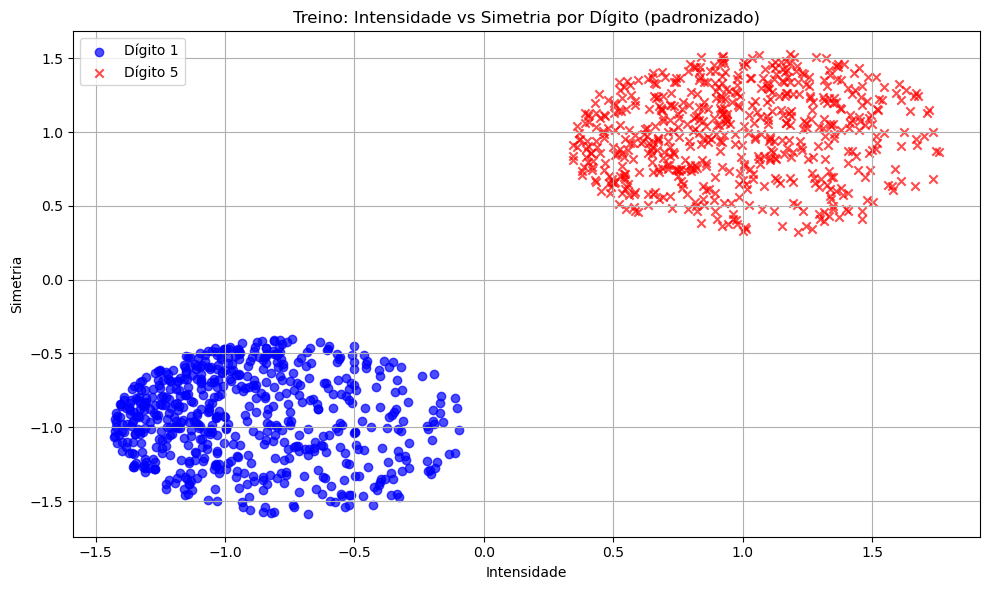

In [326]:
marcadores = {
    1: {'color': 'b', 'marker': 'o'},
    5: {'color': 'r', 'marker': 'x'},
}

# Cria o gráfico
plt.figure(figsize=(10, 6))

# Plota os dados separadamente por label
for label, cfg in marcadores.items():
    subset = df_train1x5_padronizado[df_train1x5_padronizado['label'] == label]
    plt.scatter(subset['intensidade'], subset['simetria'], c=cfg['color'], label=f'Dígito {label}', marker=cfg['marker'], alpha=0.7)
    

# Personaliza o gráfico
plt.title('Treino: Intensidade vs Simetria por Dígito (padronizado)')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### 3.4 - Treinando os classificadores

In [327]:
# Monta o X com o bias
X_train = df_train1x5_padronizado[['intensidade', 'simetria']]
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = df_test1x5_padronizado[['intensidade', 'simetria']]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Atribuindo os rotulos onde label = 1 --> y = +1 e label = 5 --> y = -1
y_train = np.where(df_train1x5_padronizado['label'] == 1, 1, -1)
y_test = np.where(df_test1x5_padronizado['label'] == 1, 1, -1)


In [328]:
import importlib
importlib.reload(perceptron)
importlib.reload(regressao_linear)
importlib.reload(regressao_logistica)

<module 'regressao_logistica' from '/home/gustavo/Gustavo/UFPB/projeto-digitos-am/regressao_logistica.py'>

#### 3.4.1 - PLA:

#### 3.4.1.1 - Treinando o modelo

In [329]:
def pred_digitos_pla(X_test, w):
    y_pred = np.sign(X_test @ w) 
    return np.where(y_pred >= 0, 1, 5)

In [330]:
it, w_pla = perceptron.PLA(X_train, y_train)
print("Pesos finais:", w_pla)
print("Iterações:", it)


Pesos finais: [ 0.         -1.3057742  -1.66670359]
Iterações: 2


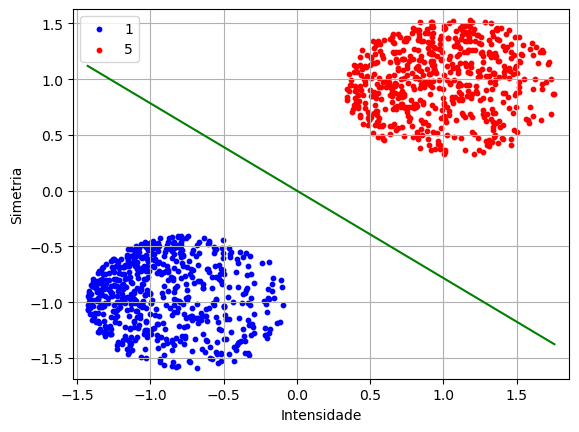

In [331]:
perceptron.plot_grafico(X_train, y_train, w_pla)

#### 3.4.1.2 - Testando o modelo

In [332]:
acuracia_teste_pla = perceptron.calcular_acuracia(X_test, y_test, w_pla)
print(f"Acurácia no teste: {acuracia_teste_pla:.2f}%")


pred_test_pla = pred_digitos_pla(X_test, w_pla)

Acurácia no teste: 100.00%


### 3.4.2 - Regressão Linear

In [333]:
def pred_digitos_lr(X_test, w):
    # Primeiro mapeia para +1 e -1, depois para os dígitos 1 e 5
    y_contínuo = X_test @ w
    y_binario = np.where(y_contínuo >= 0, 1, -1)
    return np.where(y_binario == 1, 1, 5)

#### 3.4.2.1 - Treinando o modelo

In [334]:
lr_train = regressao_linear.LinearRegression()

lr_train.fit(X_train, y_train)
w_lr = lr_train.getW()

print("Pesos obtidos: ", lr_train.getW())

Pesos obtidos:  [ 0.02702703 -0.43061202 -0.56670063]


#### 3.4.2.2 - Testando o modelo

In [335]:
acuracia_teste_lr = perceptron.calcular_acuracia(X_test, y_test, w_lr)
print(f"Acurácia no teste: {acuracia_teste_lr:.2f}%")


pred_test_lr = pred_digitos_lr(X_test, w_lr)

Acurácia no teste: 100.00%


### 3.4.3 - Regressão Logística

#### 3.4.3.1 - Treinando o modelo

In [336]:
logreg_train = regressao_logistica.LogisticRegression_()

logreg_train.fit(X_train, y_train)
w_logreg = logreg_train.getW()

print("Pesos obtidos: ", logreg_train.getW())

Pesos obtidos:  [ 0.10661471 -2.78573236 -2.94519958]


#### 3.4.3.2 - Testando o modelo

In [337]:
acuracia_teste_logreg = perceptron.calcular_acuracia(X_test, y_test, w_logreg)
print(f"Acurácia no teste: {acuracia_teste_logreg:.2f}%")

pred_test_logreg = logreg_train.predict(X_test)

Acurácia no teste: 100.00%


### 3.4.4 - Plotando o gráfico

In [338]:
def plot_grafico_retas(X, y, w_pla, w_lr, w_logreg):
    plt.clf()

    # Pontos
    positivos = X[y==1]
    negativos = X[y==-1]
    plt.scatter(positivos[:,1], positivos[:,2], s=10, c='blue', label='1')
    plt.scatter(negativos[:,1], negativos[:,2], s=10, c='red', label='5')

    # PLA
    x_line = np.linspace(min(X[:,1])-0.1, max(X[:,1])+0.1, 100)
    plt.plot(x_line, (-w_pla[0]-w_pla[1]*x_line)/w_pla[2], color='green', label='PLA')

    # Regressão Linear
    plt.plot(x_line, (-w_lr[0]-w_lr[1]*x_line)/w_lr[2], color='orange', label='Linear')

    # Regressão Logística
    plt.plot(x_line, (-w_logreg[0]-w_logreg[1]*x_line)/w_logreg[2], color='purple', label='Logística')

    plt.xlabel('Intensidade')
    plt.ylabel('Simetria')
    plt.legend()
    plt.grid(True)
    plt.show()

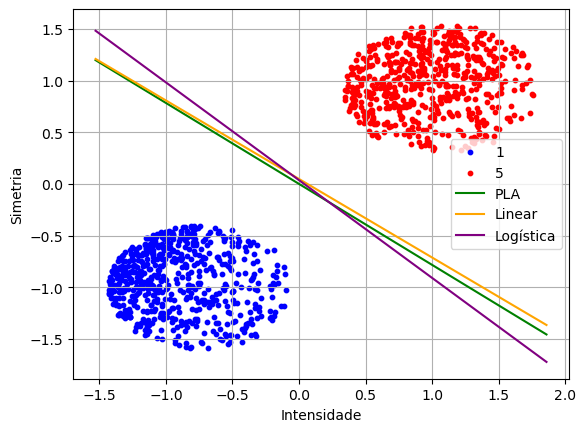

In [339]:
plot_grafico_retas(X_train, y_train, w_pla, w_lr, w_logreg)

### 3.5 - Matriz de confusão

In [340]:
def matriz_confusao(coluna_label, label_previstos, ax, labels=[1,5], title="Matriz de Confusão"):
    """
    Plota a matriz de confusão
    
    coluna_label: array de rótulos verdadeiros (1 e 5)
    label_previstos: array de rótulos previstos (1 e 5)
    labels: lista de rótulos possíveis
    title: título do gráfico
    """
    
    # Criar matriz
    n_labels = len(labels)
    mat = np.zeros((n_labels, n_labels), dtype=int)
    
    for t, p in zip(coluna_label, label_previstos):
        i = labels.index(t)
        j = labels.index(p)
        mat[i, j] += 1
    
    # Plot no eixo recebido
    sns.heatmap(
        mat,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels,
        ax=ax
    )
    
    ax.set_xlabel("Valores Previstos")
    ax.set_ylabel("Valores Reais")
    ax.set_title(title)

In [341]:
y_test_label = df_test1x5_padronizado['label']

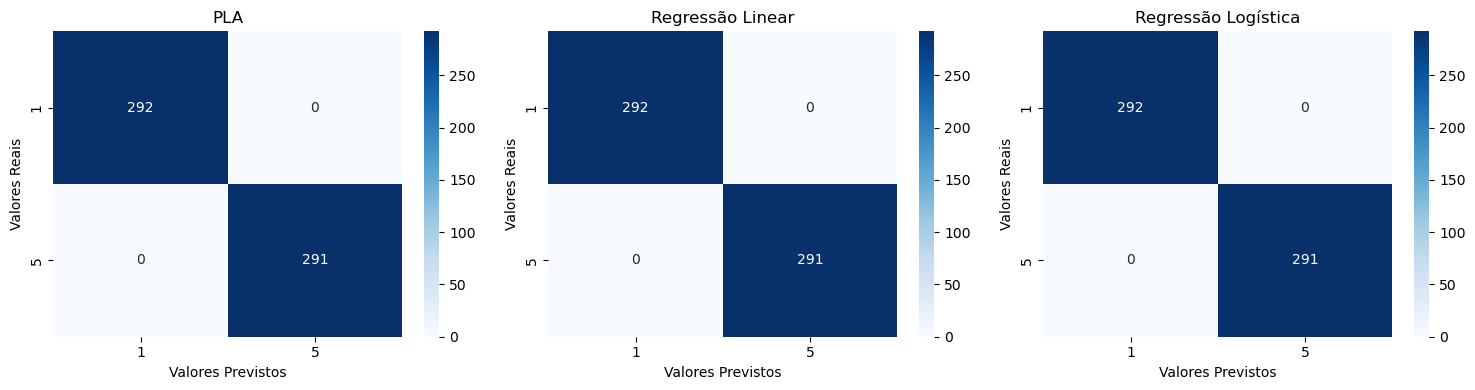

In [342]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

matriz_confusao(y_test_label, pred_test_pla, axes[0], title="PLA")
matriz_confusao(y_test_label, pred_test_lr, axes[1], title="Regressão Linear")
matriz_confusao(y_test_label, pred_test_logreg, axes[2], title="Regressão Logística")

plt.tight_layout()
plt.show()

### 3.6 - Conclusões Finais 1x5

Relembrando os dados, obtivemos: 

PLA:

In [343]:
print(f"Pesos = {w_pla}")
print(f"Acurácia = {acuracia_teste_pla}%")

Pesos = [ 0.         -1.3057742  -1.66670359]
Acurácia = 100.0%


Regressão Linear:

In [344]:
print(f"Pesos = {w_lr}")
print(f"Acurácia = {acuracia_teste_lr}%")

Pesos = [ 0.02702703 -0.43061202 -0.56670063]
Acurácia = 100.0%


Regressão Logística:

In [345]:
print(f"Pesos = {w_logreg}")
print(f"Acurácia = {acuracia_teste_logreg}%")

Pesos = [ 0.10661471 -2.78573236 -2.94519958]
Acurácia = 100.0%


Ao analisar os resultados é notável que todos os modelos obtiveram uma acurácia de 100%, essa ocorrência é fundamentada pelo fato de que ao verificar ambos os gráficos, treino e teste, de intensidade versus simetria dos dígitos 1 e 5 repara-se que é nítida a separação muito bem definida entre eles. Consequentemente ao observar as matrizes de confusão dos modelos, todas foram classificadas sem Falsos Negativos e sem Falsos Positivos.

## 4 - Classificador de dígitos completo

### 4.1 - Criando os dataframes

#### 4.1.1 - Dataframe de treino reduzido

In [346]:
df_train_redu

,label,intensidade,simetria
0,0,145.435294,148.572549
1,0,118.576471,137.113725
2,0,127.600000,134.047059
3,0,138.047059,151.003922
4,0,146.215686,122.501961
...,...,...,...
2181,5,105.686275,133.890196
2182,5,113.050980,116.698039
2183,5,110.725490,133.019608
2184,5,99.305882,132.133333


#### 4.1.1.1 - Padronizando o dataframe de treino

In [347]:
colunas = ['intensidade', 'simetria']
medias, desvios = calc_media_desvio(df_train_redu, colunas)

# OvA de One vs All
df_train_redu_OvA = padroniza_dados(df_train_redu, colunas, medias, desvios)
df_train_redu_OvA

,label,intensidade,simetria
0,0,1.862925,1.560655
1,0,0.915389,1.107280
2,0,1.233725,0.985946
3,0,1.602280,1.656853
4,0,1.890456,0.529158
...,...,...,...
2181,5,0.460644,0.979739
2182,5,0.720459,0.299522
2183,5,0.638420,0.945294
2184,5,0.235554,0.910228


#### 4.1.2 - Dataframe de teste reduzido

In [348]:
df_test_redu

,label,intensidade,simetria
0,0,147.933333,130.470588
1,0,131.054902,122.721569
2,0,134.890196,151.725490
3,0,139.976471,133.921569
4,0,129.580392,130.274510
...,...,...,...
1110,5,96.121569,139.521569
1111,5,98.439216,130.729412
1112,5,95.141176,122.227451
1113,5,106.882353,128.007843


#### 4.1.2.1 - Padronizando o dataframe de teste

In [349]:
df_test_redu_OvA = padroniza_dados(df_test_redu, colunas, medias, desvios)
df_test_redu_OvA

,label,intensidade,simetria
0,0,1.951052,0.844441
1,0,1.355608,0.537846
2,0,1.490911,1.685403
3,0,1.670347,0.980981
4,0,1.303590,0.836683
...,...,...,...
1110,5,0.123217,1.202548
1111,5,0.204980,0.854681
1112,5,0.088630,0.518296
1113,5,0.502840,0.747001


### 4.2 - Treinando os classificadores

In [350]:
def prepara_dados_treinamento(df_train, digito_alvo):
    """
    Prepara os dados para o treinamento de um classificador binário 
    dentro da estratégia 'Um contra Todos'.
    """
    df_train_filtrado = df_train.copy()

    # 1. Aplicar filtros conforme a sequencia de treino (0 -> 1 -> 4)
    if digito_alvo == 1:
        # Para treinar o classificador do '1', removemos o '0'
        df_train_filtrado = df_train_filtrado[df_train_filtrado['label'] != 0]
    elif digito_alvo == 4:
        # Para treinar o classificador do '4', removemos '0' e '1'
        df_train_filtrado = df_train_filtrado[~df_train_filtrado['label'].isin([0, 1])]

    # 2. Montar matriz X (Bias, Intensidade, Simetria)
    X_train = np.c_[np.ones(len(df_train_filtrado)), 
                     df_train_filtrado['intensidade'], 
                     df_train_filtrado['simetria']]

    # 3. Definir y: +1 para o dígito_alvo, -1 para o resto presente no dataset filtrado
    y_train = np.where(df_train_filtrado['label'] == digito_alvo, 1, -1)

    return X_train, y_train

In [351]:
def plot_grafico_OvA(X, y, w, ax, label_azul="", label_vermelho=""):
    
    # pontos
    positivos = X[y == 1]
    negativos = X[y == -1]

    ax.scatter(positivos[:, 1], positivos[:, 2],
               s=10, c="blue", label=label_azul)
    ax.scatter(negativos[:, 1], negativos[:, 2],
               s=10, c="red", label=label_vermelho)

    # reta aprendida
    x_line = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)

    if w[2] != 0:
        y_line = (-w[0] - w[1]*x_line) / w[2]
        ax.plot(x_line, y_line, color="green")

    ax.set_xlabel("Intensidade")
    ax.set_ylabel("Simetria")
    ax.legend()
    ax.grid(True)

    ax.set_xlim(min(X[:, 1]) - 0.1, max(X[:, 1]) + 0.1)
    ax.set_ylim(min(X[:, 2]) - 0.1, max(X[:, 2]) + 0.1)

In [352]:
X_train_0v1_4_5, y_train_0v1_4_5 = prepara_dados_treinamento(df_train_redu_OvA, 0)
X_train_1v4_5, y_train_1v4_5 = prepara_dados_treinamento(df_train_redu_OvA, 1)
X_train_4v5, y_train_4v5 = prepara_dados_treinamento(df_train_redu_OvA, 4)

#### 4.2.1 - PLA

Relembrando o grafico com os dados plotados:

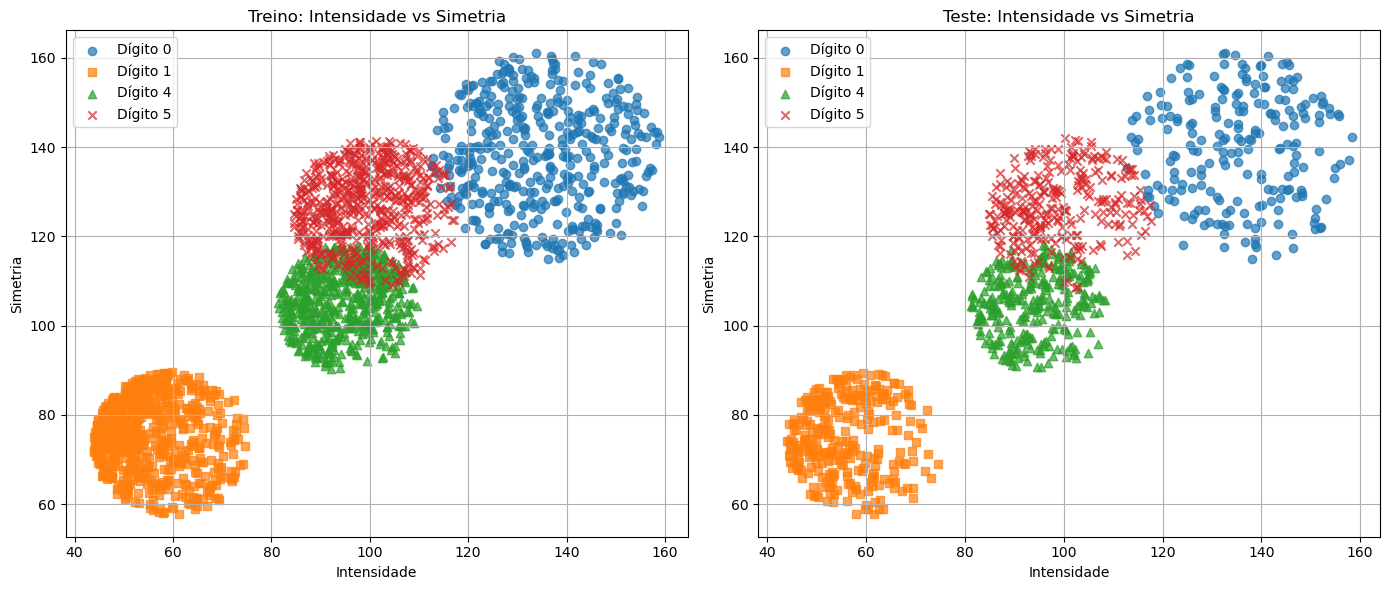

In [353]:
plot_grafico_dataframe()

É vísivel que o dataframe possui sobreposições em parte dos clusters dos dígitos 0, 4 e 5. O que torna o PLA inviável, nesse caso será utilizado o Pocket_PLA com até 1000 iterações.

In [354]:
w_pla_0v1_4_5, erros_0v1_4_5 = perceptron.pocket_PLA(X_train_0v1_4_5, y_train_0v1_4_5, max_iter=1000)
w_pla_1v4_5, erros_1v4_5 = perceptron.pocket_PLA(X_train_1v4_5, y_train_1v4_5, max_iter=1000)
w_pla_4v5, erros_4v5 = perceptron.pocket_PLA(X_train_4v5, y_train_4v5, max_iter=1000)


print("Pesos Pocket PLA (0 vs 1,4,5):", w_pla_0v1_4_5)
print("Erros no treino:", erros_0v1_4_5)
print("\n")
print("Pesos Pocket PLA (1 vs 4,5):", w_pla_1v4_5)
print("Erros no treino:", erros_1v4_5)
print("\n")
print("Pesos Pocket PLA (4 vs 5):", w_pla_4v5)
print("Erros no treino:", erros_4v5)

Pesos Pocket PLA (0 vs 1,4,5): [-8.          7.96999293  1.50948527]
Erros no treino: 7


Pesos Pocket PLA (1 vs 4,5): [-1.        -2.0229922 -0.5567759]
Erros no treino: 0


Pesos Pocket PLA (4 vs 5): [ 1.         -1.07168259 -3.90435651]
Erros no treino: 88


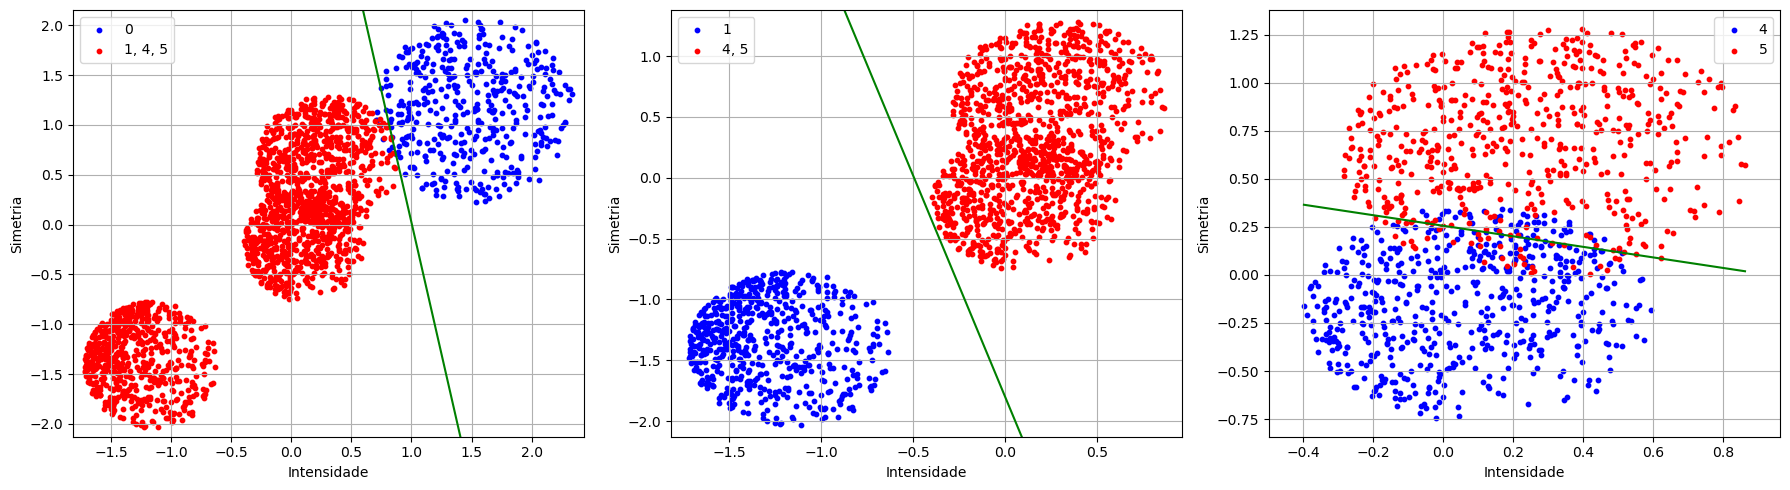

In [355]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_grafico_OvA(X_train_0v1_4_5, y_train_0v1_4_5,
                 w_pla_0v1_4_5, axes[0], "0", "1, 4, 5")

plot_grafico_OvA(X_train_1v4_5, y_train_1v4_5,
                 w_pla_1v4_5, axes[1], "1", "4, 5")

plot_grafico_OvA(X_train_4v5, y_train_4v5,
                 w_pla_4v5, axes[2], "4", "5")

plt.tight_layout()
plt.show()

#### 4.2.2 - Regressão Linear

In [356]:
lr_train_0v1_4_5 = regressao_linear.LinearRegression()
lr_train_0v1_4_5.fit(X_train_0v1_4_5, y_train_0v1_4_5)
w_lr_0v1_4_5 = lr_train_0v1_4_5.getW()
print("Pesos obtidos (0 vs 1,4,5): ", lr_train_0v1_4_5.getW())

lr_train_1v4_5 = regressao_linear.LinearRegression()
lr_train_1v4_5.fit(X_train_1v4_5, y_train_1v4_5)
w_lr_1v4_5 = lr_train_1v4_5.getW()
print("Pesos obtidos (1 vs 4,5): ", lr_train_1v4_5.getW())

lr_train_4v5 = regressao_linear.LinearRegression()
lr_train_4v5.fit(X_train_4v5, y_train_4v5)
w_lr_4v5 = lr_train_4v5.getW()
print("Pesos obtidos (4 vs 5): ", lr_train_4v5.getW())



Pesos obtidos (0 vs 1,4,5):  [-0.61116194  0.72127741 -0.16924582]
Pesos obtidos (1 vs 4,5):  [-0.71382796 -0.90902775 -0.28424453]
Pesos obtidos (4 vs 5):  [ 0.45581355 -0.14496226 -1.57794561]


#### 4.2.3 - Regressão Logística

In [357]:
logreg_train_0v1_4_5 = regressao_logistica.LogisticRegression_()
logreg_train_0v1_4_5.fit(X_train_0v1_4_5, y_train_0v1_4_5)
w_logreg_0v1_4_5 = logreg_train_0v1_4_5.getW()
print("Pesos obtidos (0 vs 1,4,5): ", logreg_train_0v1_4_5.getW())

logreg_train_1v4_5 = regressao_logistica.LogisticRegression_()
logreg_train_1v4_5.fit(X_train_1v4_5, y_train_1v4_5)
w_logreg_1v4_5 = logreg_train_1v4_5.getW()
print("Pesos obtidos (1 vs 4,5): ", logreg_train_1v4_5.getW())

logreg_train_4v5 = regressao_logistica.LogisticRegression_()
logreg_train_4v5.fit(X_train_4v5, y_train_4v5)
w_logreg_4v5 = logreg_train_4v5.getW()
print("Pesos obtidos (4 vs 5): ", logreg_train_4v5.getW())

Pesos obtidos (0 vs 1,4,5):  [-3.88123957  3.48468046  1.04500968]
Pesos obtidos (1 vs 4,5):  [-3.40932584 -2.99766788 -2.61588425]
Pesos obtidos (4 vs 5):  [ 1.43375959 -0.80084317 -5.36835355]


### 4.3 - Comparação entre os classificadores

In [358]:
# Classifica os dados não vistos

def pred_digitos_OvA(X_test, w0, w1, w4):
    y_pred = []
    X_test = np.array(X_test, dtype=float)

    for x in X_test:
        # Se o sinal for >= 0, consideramos como a classe +1
        if (x @ w0) >= 0:
            y_pred.append(0)
        elif (x @ w1) >= 0:
            y_pred.append(1)
        elif (x @ w4) >= 0:
            y_pred.append(4)
        else:
            y_pred.append(5)
    
    return np.array(y_pred)

In [359]:
X_test_OvA = np.c_[np.ones(len(df_test_redu_OvA)),
                    df_test_redu_OvA['intensidade'],
                    df_test_redu_OvA['simetria']]

y_test_OvA = df_test_redu_OvA['label'].values

In [360]:
y_pred_PLA = pred_digitos_OvA(X_test_OvA, w_pla_0v1_4_5, w_pla_1v4_5, w_pla_4v5)
y_pred_LR = pred_digitos_OvA(X_test_OvA, w_lr_0v1_4_5, w_lr_1v4_5, w_lr_4v5)
y_pred_logreg = pred_digitos_OvA(X_test_OvA, w_logreg_0v1_4_5, w_logreg_1v4_5, w_logreg_4v5)

#### 4.3.1 - Testando o pocket PLA:

In [361]:
acuracia = np.mean(y_pred_PLA == y_test_OvA) * 100
print(f"Acurácia: {acuracia:.2f}%")

Acurácia: 95.78%


#### 4.3.2 - Testando a Regressão Linear:


In [362]:
acuracia = np.mean(y_pred_LR == y_test_OvA) * 100
print(f"Acurácia: {acuracia:.2f}%")

Acurácia: 93.18%


#### 4.3.3 - Testando a Regressão Logística:


In [363]:
acuracia = np.mean(y_pred_logreg == y_test_OvA) * 100
print(f"Acurácia: {acuracia:.2f}%")

Acurácia: 96.68%


### 4.4 - Matriz confusão


In [364]:
def matriz_confusao_OvA(coluna_label, label_previstos, ax,
                        labels=[0,1,4,5], title="Matriz de Confusão"):
    """
    Plota a matriz de confusão para múltiplas classes em um eixo específico.
    """
    
    n_labels = len(labels)
    mat = np.zeros((n_labels, n_labels), dtype=int)

    for t, p in zip(coluna_label, label_previstos):
        i = labels.index(t)
        j = labels.index(p)
        mat[i, j] += 1

    sns.heatmap(mat,
                annot=True,
                fmt="d",
                cmap="Blues",
                xticklabels=labels,
                yticklabels=labels,
                ax=ax)

    ax.set_xlabel("Valores Previstos")
    ax.set_ylabel("Valores Reais")
    ax.set_title(title)

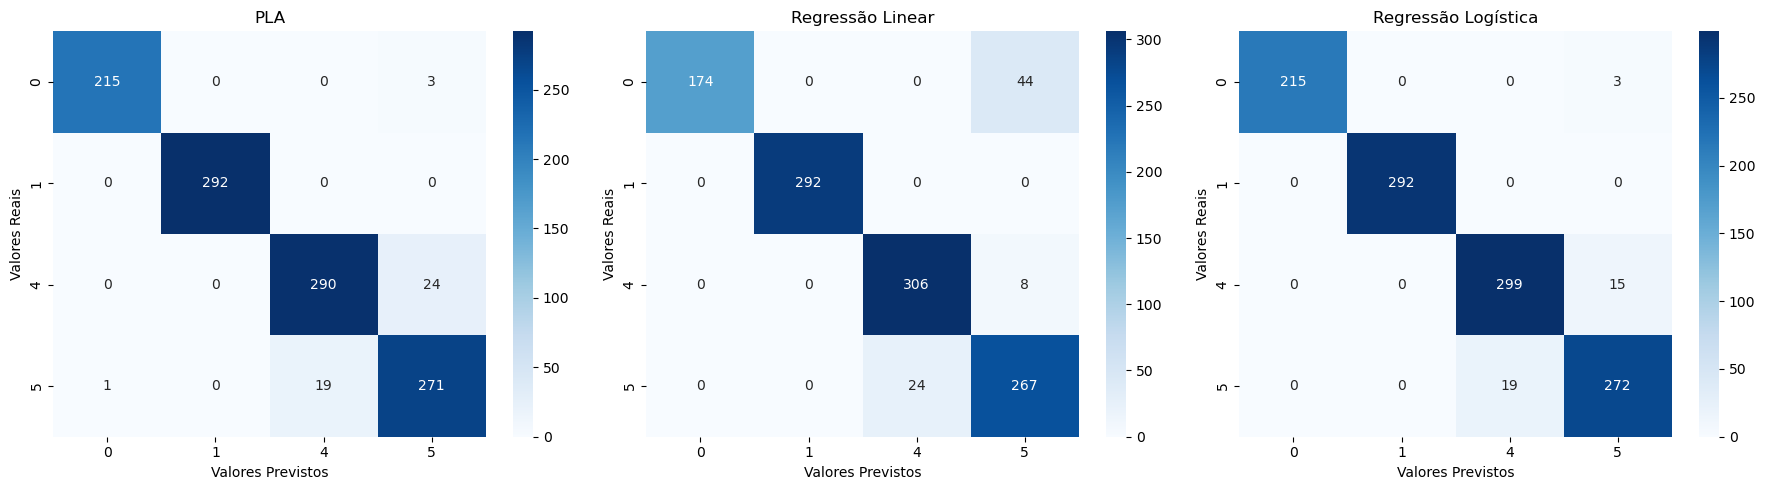

In [365]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

y_test_label_OvA = df_test_redu_OvA['label']

matriz_confusao_OvA(y_test_label_OvA, y_pred_PLA,
                    axes[0], title="PLA")

matriz_confusao_OvA(y_test_label_OvA, y_pred_LR,
                    axes[1], title="Regressão Linear")

matriz_confusao_OvA(y_test_label_OvA, y_pred_logreg,
                    axes[2], title="Regressão Logística")

plt.tight_layout()
plt.show()

### 4.4 - Relatório de Eficácia


In [366]:
def relatorio_eficacia(y_real, y_pred, labels=[0, 1, 4, 5]):
    print(f"{'Dígito':<10} | {'Precisão':<10} | {'Recall':<10} | {'F1-Score':<10}")
    print("-" * 50)
    
    acertos = np.sum(y_real == y_pred)
    acuracia_global = acertos / len(y_real)
    
    for label in labels:
        # Verdadeiro Positivo (TP), Falso Positivo (FP), Falso Negativo (FN)
        tp = np.sum((y_real == label) & (y_pred == label))
        fp = np.sum((y_real != label) & (y_pred == label))
        fn = np.sum((y_real == label) & (y_pred != label))
        
        # Cálculos com proteção contra divisão por zero
        precisao = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precisao * recall) / (precisao + recall) if (precisao + recall) > 0 else 0
        
        print(f"{label:<10} | {precisao:<10.2f} | {recall:<10.2f} | {f1:<10.2f}")
    
    print("-" * 50)
    print(f"Acurácia Global: {acuracia_global:.2%}\n")

In [367]:
print("Relatório: Perceptron (PLA)")
relatorio_eficacia(y_test_label_OvA, y_pred_PLA)

print("Relatório: Regressão Linear")
relatorio_eficacia(y_test_label_OvA, y_pred_LR)

print("Relatório: Regressão Logística")
relatorio_eficacia(y_test_label_OvA, y_pred_logreg)

Relatório: Perceptron (PLA)
Dígito     | Precisão   | Recall     | F1-Score  
--------------------------------------------------
0          | 1.00       | 0.99       | 0.99      
1          | 1.00       | 1.00       | 1.00      
4          | 0.94       | 0.92       | 0.93      
5          | 0.91       | 0.93       | 0.92      
--------------------------------------------------
Acurácia Global: 95.78%

Relatório: Regressão Linear
Dígito     | Precisão   | Recall     | F1-Score  
--------------------------------------------------
0          | 1.00       | 0.80       | 0.89      
1          | 1.00       | 1.00       | 1.00      
4          | 0.93       | 0.97       | 0.95      
5          | 0.84       | 0.92       | 0.88      
--------------------------------------------------
Acurácia Global: 93.18%

Relatório: Regressão Logística
Dígito     | Precisão   | Recall     | F1-Score  
--------------------------------------------------
0          | 1.00       | 0.99       | 0.99      
1       

### 4.5 - Plotagem dos Gráficos com as 3 retas

In [368]:
def plot_comparacao_modelos(X, y, pesos_modelos, df_test_redu):
    """
    Plota três gráficos lado a lado, um para cada modelo (PLA, Linear, Logística).
    pesos_modelos: dicionário contendo tuplas (w0, w1, w4) para cada algoritmo.
    """
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    titulos = ["Perceptron (PLA)", "Regressão Linear", "Regressão Logística"]
    algoritmos = ['pla', 'linear', 'logistica']
    
    # Cores e Labels para os pontos
    cores = {0: 'blue', 1: 'orange', 4: 'green', 5: 'red'}
    marcadores = {0: 'o', 1: 's', 4: '^', 5: 'x'}

    for idx, alg in enumerate(algoritmos):
        ax = axes[idx]
        w0, w1, w4 = pesos_modelos[alg]
        
        # 1. Plotar os pontos de teste
        for label in [0, 1, 4, 5]:
            mask = (y == label)
            ax.scatter(X[mask, 1], X[mask, 2], 
                       c=cores[label], marker=marcadores[label], 
                       label=f'Dígito {label}', alpha=0.5, s=25)

        # 2. Configurar o domínio das retas
        x_min, x_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        x_line = np.linspace(x_min, x_max, 100)
        
        # 3. Plotar as retas (Fronteiras de Decisão)
        # y = (-w0 - w1*x) / w2
        ax.plot(x_line, (-w0[0] - w0[1]*x_line) / w0[2], 'b-', linewidth=2, label='0 vs Resto')
        ax.plot(x_line, (-w1[0] - w1[1]*x_line) / w1[2], 'y-', linewidth=2, label='1 vs 4,5')
        ax.plot(x_line, (-w4[0] - w4[1]*x_line) / w4[2], 'g-', linewidth=2, label='4 vs 5')

        # Personalização de cada subplot
        ax.set_title(titulos[idx])
        ax.set_xlabel("Intensidade")
        ax.set_ylabel("Simetria")
        ax.set_ylim(X[:, 2].min() - 0.5, X[:, 2].max() + 0.5) # Fixar escala y para comparação
        ax.grid(True, linestyle='--', alpha=0.7)
        if idx == 2: # Legenda apenas no último para não poluir
            ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

    plt.tight_layout()
    plt.show()

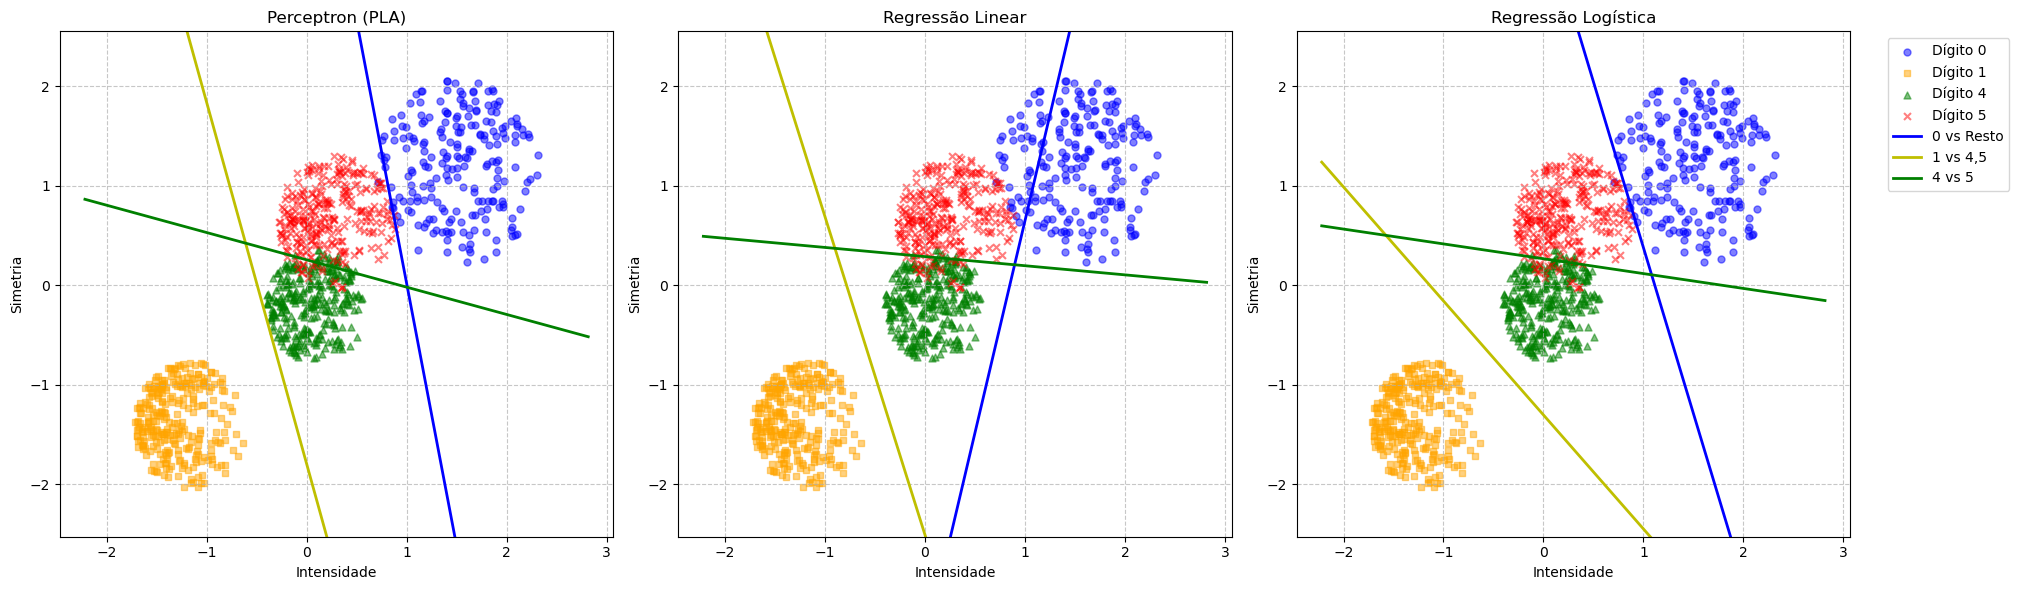

In [369]:

dicionario_pesos = {
     'pla': (w_pla_0v1_4_5, w_pla_1v4_5, w_pla_4v5),
     'linear': (w_lr_0v1_4_5, w_lr_1v4_5, w_lr_4v5),
     'logistica': (w_logreg_0v1_4_5, w_logreg_1v4_5, w_logreg_4v5)
 }
plot_comparacao_modelos(X_test_OvA, y_test_label_OvA, dicionario_pesos, df_test_redu_OvA)

## 5 - Implementações avançadas

In [370]:
import itertools

def buscar_melhor_ordem(df_train, df_test, modelo_class):
    digitos = [0, 1, 4, 5]
    # Testamos todas as combinações de ordens possíveis
    permutacoes = list(itertools.permutations(digitos))
    
    melhor_acuracia = -1
    melhor_ordem = None
    melhores_pesos = []

    # Preparação do X_test completo (Bias, Intensidade, Simetria)
    X_test_all = np.c_[np.ones(len(df_test)), df_test['intensidade'], df_test['simetria']]
    y_test_real = df_test['label'].values

    for ordem in permutacoes:
        ws = []
        df_temp = df_train.copy()
        
        # Treinamos apenas N-1 classificadores (os 3 primeiros da permutação)
        # O 4º dígito é o resíduo (o que sobra no 'else' da predição)
        for i in range(len(ordem) - 1):
            d_alvo = ordem[i]
            
            X_t, y_t = prepara_dados_treinamento_dinamico(df_temp, d_alvo)
            
            modelo = modelo_class() 
            modelo.fit(X_t, y_t)
            ws.append(modelo.getW())
            
            # Filtra o dataset para o próximo especialista não ver este dígito
            df_temp = df_temp[df_temp['label'] != d_alvo]

        # Avalia a acurácia desta permutação específica
        y_pred = pred_digitos_hierarquico_dinamico(X_test_all, ws, ordem)
        acc = np.mean(y_pred == y_test_real)

        if acc > melhor_acuracia:
            melhor_acuracia = acc
            melhor_ordem = ordem
            melhores_pesos = ws

    return melhor_ordem, melhor_acuracia, melhores_pesos

def pred_digitos_hierarquico_dinamico(X_test, weights, ordem):
    y_pred = []
    # ordem contém (d1, d2, d3, d4)
    # weights contém (w_d1, w_d2, w_d3)
    
    for x in X_test:
        classificado = False
        for i in range(len(weights)):
            # Se o sinal for positivo, pertence ao dígito daquela posição na ordem
            if (x @ weights[i]) >= 0:
                y_pred.append(ordem[i])
                classificado = True
                break
        
        if not classificado:
            # Se falhou em todos os N-1 testes, é o último dígito da permutação
            y_pred.append(ordem[-1])
            
    return np.array(y_pred)

def prepara_dados_treinamento_dinamico(df_atual, digito_alvo):
    """
    Prepara os dados para o treinamento do especialista atual.
    df_atual: já deve vir filtrado (sem os dígitos que já ganharam especialistas).
    """
    # 1. Montar matriz X (Bias, Intensidade, Simetria)
    X_train = np.c_[np.ones(len(df_atual)), 
                    df_atual['intensidade'], 
                    df_atual['simetria']]

    # 2. Definir y: +1 para o dígito_alvo, -1 para TODOS os outros que sobraram
    y_train = np.where(df_atual['label'] == digito_alvo, 1, -1)

    return X_train, y_train

In [371]:
# Definimos como o modelo deve ser construído
config_modelo = lambda: regressao_logistica_wd.LogisticRegressionWD_(eta=0.01, tmax=1000, lamb=0.001)

# Chamada da função
melhor_ordem, melhor_acc, melhores_pesos = buscar_melhor_ordem(
    df_train_redu_OvA, 
    df_test_redu_OvA, 
    config_modelo
)

print(f"A melhor ordem encontrada foi: {melhor_ordem}")
print(f"Acurácia atingida: {melhor_acc:.2%}")

A melhor ordem encontrada foi: (0, 1, 4, 5)
Acurácia atingida: 94.98%


In [372]:
import itertools
import numpy as np
from sklearn.model_selection import train_test_split

def selecao_hiperparametros_completa(df_total_treino, df_teste_final):
    # I. Divisão dos dados: treinamento (80%) e validação (20%)
    # O df_teste_final (conjunto de teste) fica guardado para o final
    df_train, df_val = train_test_split(df_total_treino, test_size=0.2, random_state=42)
    
    # II. Valores de λ: Escala logarítmica para explorar ampla gama
    lambdas = [10**-4, 10**-3, 10**-2, 0.1, 1, 10, 100]
    digitos = [0, 1, 4, 5]
    permutacoes = list(itertools.permutations(digitos))
    
    melhor_erro_val = float('inf')
    melhor_lambda = None
    melhor_ordem = None
    melhores_pesos = []

    # Preparação do X_val para validação (Bias, Intensidade, Simetria)
    X_val = np.c_[np.ones(len(df_val)), df_val['intensidade'], df_val['simetria']]
    y_val_real = df_val['label'].values

    # III. Iteração e treinamento: Testamos cada λ e cada ordem
    for l in lambdas:
        for ordem in permutacoes:
            ws_temp = []
            df_temp = df_train.copy()
            
            # Treinamento dos N-1 especialistas
            for i in range(len(ordem) - 1):
                d_alvo = ordem[i]
                X_t, y_t = prepara_dados_treinamento_dinamico(df_temp, d_alvo)
                
                # A. Treine o modelo w_i utilizando o conjunto de treinamento
                modelo = regressao_logistica_wd.LogisticRegressionWD_(eta=0.01, tmax=1000, lamb=l)
                modelo.fit(X_t, y_t)
                ws_temp.append(modelo.getW())
                
                df_temp = df_temp[df_temp['label'] != d_alvo]

            # B. Calcule o erro no conjunto de validação
            y_pred_val = pred_digitos_hierarquico_dinamico(X_val, ws_temp, ordem)
            erro_val = np.mean(y_pred_val != y_val_real) # Erro binário/classificação

            # IV. Melhor w_i: escolha o modelo com menor erro de validação
            if erro_val < melhor_erro_val:
                melhor_erro_val = erro_val
                melhor_lambda = l
                melhor_ordem = ordem
                melhores_pesos = ws_temp

    # V. Treinamento final: Re-treinar com Treino + Validação
    # Usando o lambda e ordem vencedores para máxima performance
    print(f"Melhor λ={melhor_lambda} | Melhor Ordem={melhor_ordem} ---")
    
    # VI. Avaliação final: Estimação imparcial no conjunto de TESTE
    X_test_final = np.c_[np.ones(len(df_teste_final)), 
                         df_teste_final['intensidade'], 
                         df_teste_final['simetria']]
    y_test_real = df_teste_final['label'].values
    
    y_pred_final = pred_digitos_hierarquico_dinamico(X_test_final, melhores_pesos, melhor_ordem)
    acuracia_final = np.mean(y_pred_final == y_test_real)
    
    return melhor_lambda, melhor_ordem, acuracia_final, melhores_pesos

# Chamada do experimento completo
melhor_l, melhor_o, acc_final, pesos_finais = selecao_hiperparametros_completa(
    df_train_redu_OvA, 
    df_test_redu_OvA
)

print(f"Acurácia Final no Teste: {acc_final:.2%}")

Melhor λ=0.0001 | Melhor Ordem=(0, 1, 4, 5) ---
Acurácia Final no Teste: 95.07%
